In [1]:
%matplotlib inline

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from sklearn.datasets import load_iris

from sklearn.pipeline import Pipeline

from sklearn.compose import ColumnTransformer, make_column_selector

from sklearn.preprocessing import MinMaxScaler, FunctionTransformer, PolynomialFeatures

from sklearn.feature_selection import RFE

from sklearn.model_selection import train_test_split

from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier

In [3]:
from sklearn import set_config
set_config(display='diagram')

# Tree and Ensemble Methods

## Live demos

In [4]:
iris_data, iris_labels = load_iris().data, load_iris().target

In [5]:
iris_data.shape

(150, 4)

In [6]:
X_train, X_test, y_train, y_test = train_test_split(iris_data, iris_labels, train_size = 100, stratify = iris_labels)

In [7]:
X_train.shape, X_test.shape,y_train.shape, y_test.shape

((100, 4), (50, 4), (100,), (50,))

In [8]:
tree = DecisionTreeClassifier(
    criterion = 'entropy'
)

In [9]:
tree.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy')

In [10]:
tree.tree_.impurity

array([1.5848187 , 0.        , 0.9998393 , 0.19143325, 0.        ,
       1.        , 0.        , 0.        , 0.19590927, 1.        ,
       0.        , 0.        , 0.        ])

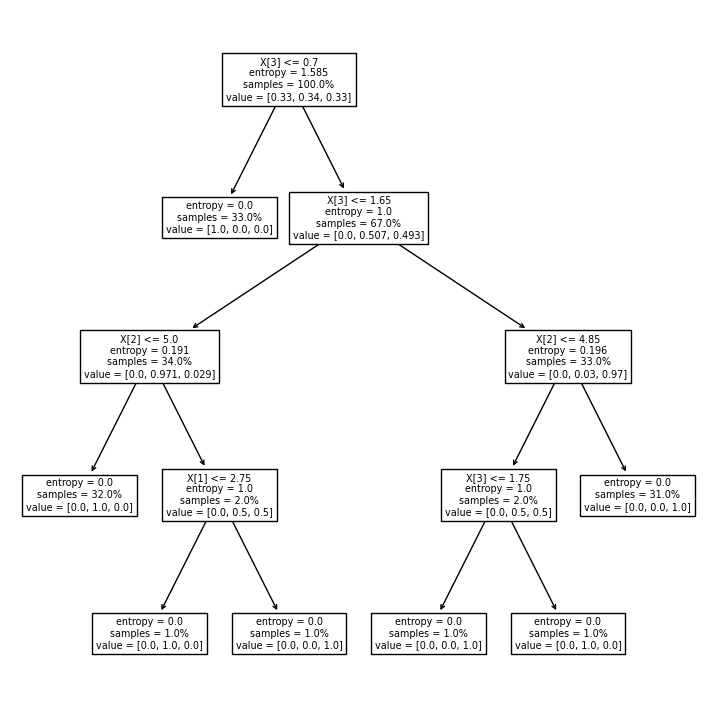

In [11]:
plt.figure(figsize = (9, 9))
plot_tree(tree, proportion=True)
plt.show()

In [12]:
tree.feature_importances_

array([0.        , 0.01261974, 0.05662311, 0.93075715])

In [13]:
tree.score(X_train, y_train)

1.0

In [14]:
tree.score(X_test, y_test)

0.9

### Create a tree with max_depth = 2

In [15]:
tree = DecisionTreeClassifier(
    criterion = 'entropy',
    max_depth = 2
)

In [16]:
tree.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=2)

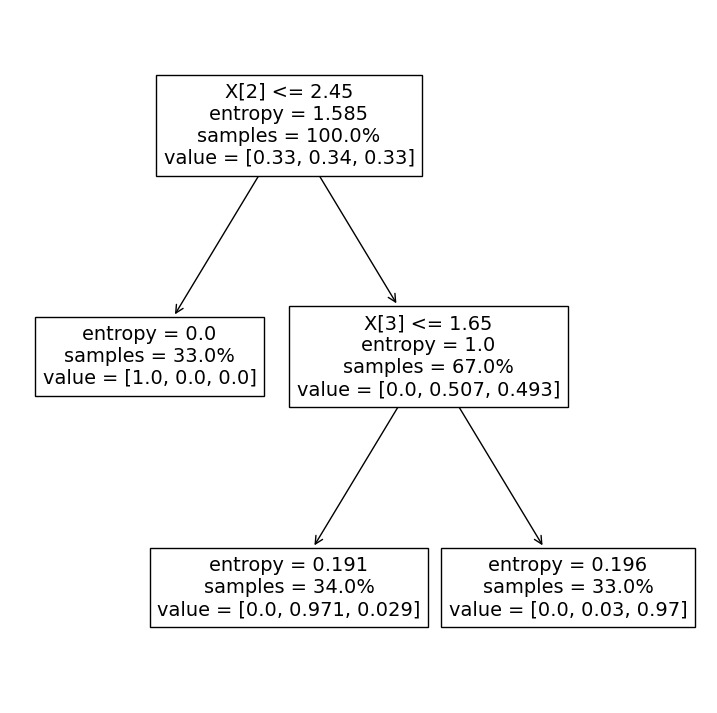

In [17]:
plt.figure(figsize = (9, 9))
plot_tree(tree, proportion=True)
plt.show()

In [18]:
tree.score(X_train, y_train)

0.98

In [19]:
tree.score(X_test, y_test)

0.92

### Fine-tuning using other hyperparameters.

In [20]:
tree = DecisionTreeClassifier(
    criterion = 'entropy',
    min_samples_leaf = 5
)

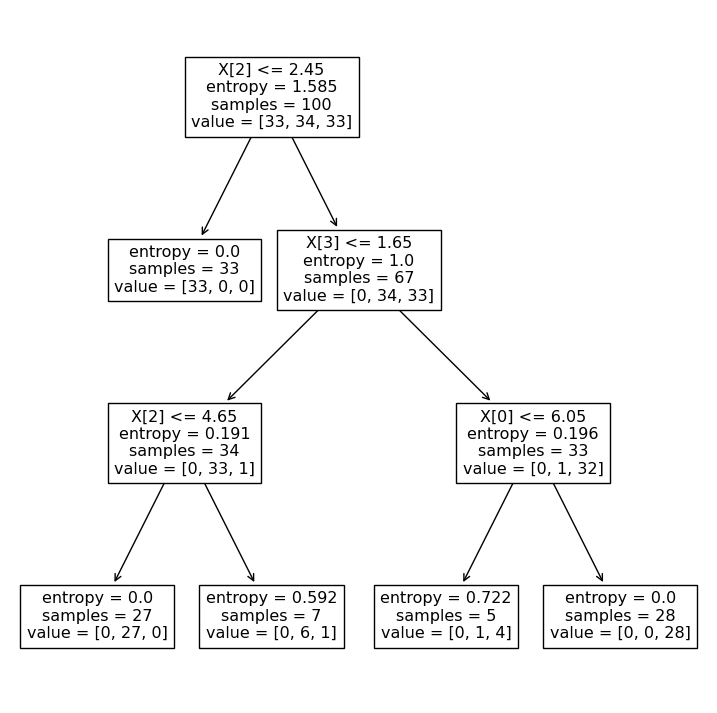

0.98
0.92


In [21]:
tree.fit(X_train, y_train)

plt.figure(figsize = (9, 9))
plot_tree(tree, proportion=False)
plt.show()

print(tree.score(X_train, y_train))
print(tree.score(X_test, y_test))

In [22]:
tree = DecisionTreeClassifier(
    criterion = 'gini',
    min_samples_leaf = 5
)

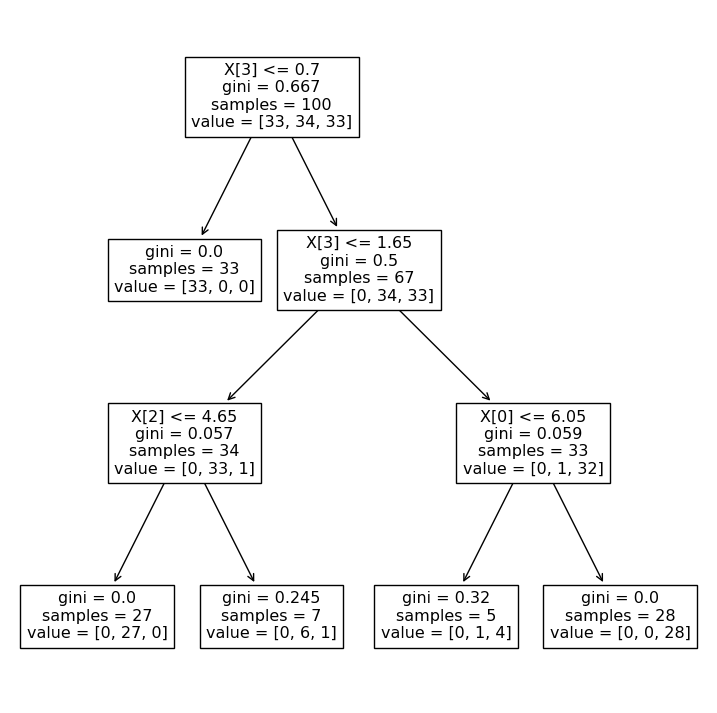

0.98
0.92


In [23]:
tree.fit(X_train, y_train)

plt.figure(figsize = (9, 9))
plot_tree(tree, proportion=False)
plt.show()

print(tree.score(X_train, y_train))
print(tree.score(X_test, y_test))

### Plotting a Decision Tree for two features.

In [24]:
X_plot = iris_data[:, :2] # Sepal length, sepal width
y_plot = iris_labels
h = 0.02 # Step size
color_dict = {0: "blue", 1: "lightgreen", 2: "red"}
colors = [color_dict[i] for i in y_plot]
depth_2 = DecisionTreeClassifier(max_depth = 2).fit(X_plot, y_plot)
depth_4 = DecisionTreeClassifier(max_depth = 4).fit(X_plot, y_plot)
titles = ["Max depth = 2", "Max depth = 4"]

In [25]:
# Create a mesh
x_min, x_max = X_plot[:, 0].min() - 1, X_plot[:, 0].max() + 1
y_min, y_max = X_plot[:, 1].min() - 1, X_plot[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))


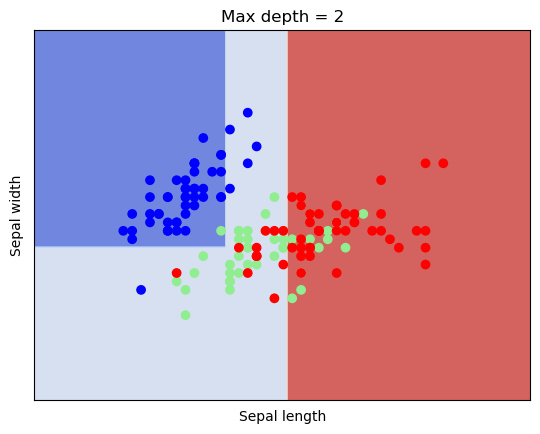

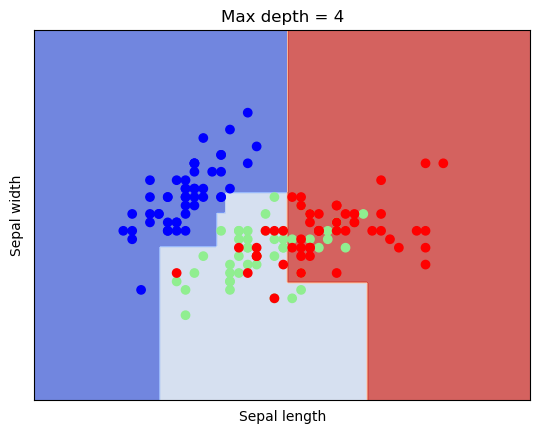

In [26]:
# Create and evaluate predictions for all classifiers
for i, classifier in enumerate((depth_2, depth_4)):
    plt.figure()
    Z = classifier.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap = plt.cm.coolwarm, alpha = 0.8)
    plt.scatter(X_plot[:, 0], X_plot[:, 1], c = colors)
    plt.xlabel("Sepal length")
    plt.ylabel("Sepal width")
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.xticks(())
    plt.yticks(())
    plt.title(titles[i])
    plt.show()

### Random Forest

#### Manually creating a forest.

In [27]:
forest = [
    DecisionTreeClassifier(splitter='random', max_depth=5),
    DecisionTreeClassifier(splitter='random', max_depth=5),
    DecisionTreeClassifier(splitter='random', max_depth=5),
    DecisionTreeClassifier(splitter='random', max_depth=5),
]

In [28]:
for tree in forest:
    tree.fit(X_train, y_train)

In [29]:
forest[0].feature_importances_

array([0.07339184, 0.1930299 , 0.68826265, 0.04531561])

In [30]:
forest[1].feature_importances_

array([0.07119164, 0.        , 0.54683845, 0.38196991])

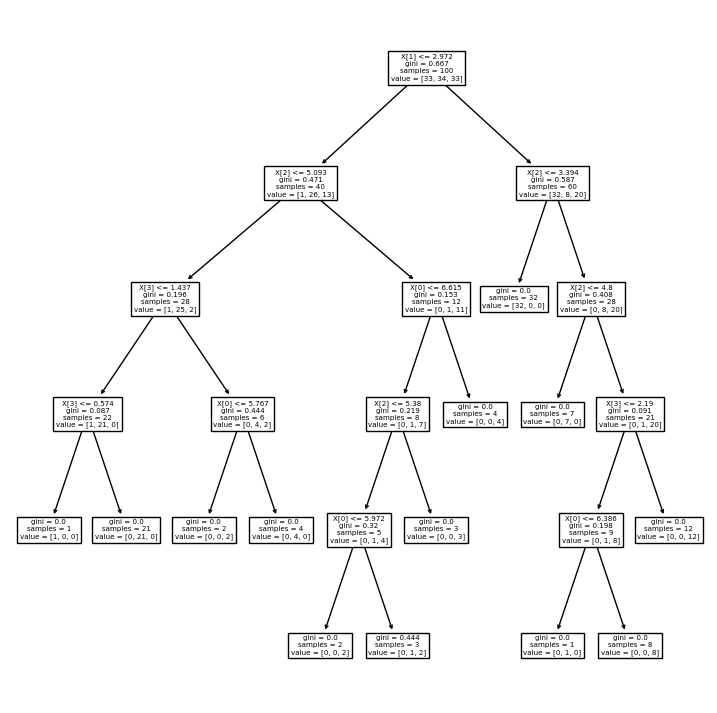

In [31]:
plt.figure(figsize= (9, 9))
plot_tree(forest[0])
plt.show()

### Random Forest Classifier

In [32]:
random_forest = RandomForestClassifier(n_estimators=20, max_depth=3, n_jobs=-1)

In [33]:
random_forest.fit(X_train, y_train)

RandomForestClassifier(max_depth=3, n_estimators=20, n_jobs=-1)

In [34]:
random_forest.base_estimator_

DecisionTreeClassifier()

In [35]:
random_forest.feature_importances_

array([0.09186313, 0.01607022, 0.47729208, 0.41477456])

### Ada Boost Classifier

In [36]:
ada = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=1), n_estimators=20) 

In [37]:
ada.fit(iris_data, iris_labels)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=1),
                   n_estimators=20)

In [38]:
ada.feature_importances_

array([0.  , 0.  , 0.45, 0.55])

In [39]:
ada.score(X_train, y_train)

0.97

In [40]:
ada.score(X_test, y_test)

0.98

The algorithm overfits.

In [41]:
ada.estimator_errors_

array([3.33333333e-01, 6.00022589e-02, 3.33355372e-01, 1.20397414e-01,
       3.33354186e-01, 2.46496772e-04, 3.33379977e-01, 3.24696290e-04,
       3.33365707e-01, 3.77301322e-04, 3.33379704e-01, 3.49084999e-04,
       3.33368069e-01, 3.77542089e-04, 3.33377933e-01, 3.52106376e-04,
       3.33369433e-01, 3.72712090e-04, 3.33376616e-01, 3.54056001e-04])

In [42]:
ada.estimators_[0]

DecisionTreeClassifier(max_depth=1, random_state=733429774)

In [43]:
adult_data = pd.read_csv('data/adult.csv')

In [44]:
adult_data.shape

(48842, 15)

In [45]:
adult_data.dtypes

age                 int64
workclass          object
fnlwgt              int64
education          object
educational-num     int64
marital-status     object
occupation         object
relationship       object
race               object
gender             object
capital-gain        int64
capital-loss        int64
hours-per-week      int64
native-country     object
income             object
dtype: object

In [46]:
X = adult_data.drop(columns=['income'])
y = adult_data.income

In [47]:
X.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'educational-num',
       'marital-status', 'occupation', 'relationship', 'race', 'gender',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country'],
      dtype='object')

In [48]:
y.name

'income'

In [49]:
X.columns = [col.replace('-', '_') for col in X.columns]

In [50]:
X.head()

,age,workclass,fnlwgt,education,educational_num,marital_status,occupation,relationship,race,gender,capital_gain,capital_loss,hours_per_week,native_country
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States


In [51]:
X.dtypes

age                 int64
workclass          object
fnlwgt              int64
education          object
educational_num     int64
marital_status     object
occupation         object
relationship       object
race               object
gender             object
capital_gain        int64
capital_loss        int64
hours_per_week      int64
native_country     object
dtype: object

In [52]:
transformer = ColumnTransformer(
    [('categorical',FunctionTransformer(func = lambda data: pd.get_dummies(data)),['workclass','education',
     'marital_status', 'occupation','relationship','race',
     'gender','native_country']),
     ('everything_else', MinMaxScaler(), X.columns)]
)

In [53]:
transformer

ColumnTransformer(transformers=[('categorical',
                                 FunctionTransformer(func=<function <lambda> at 0x0000022F5F54B160>),
                                 ['workclass', 'education', 'marital_status',
                                  'occupation', 'relationship', 'race',
                                  'gender', 'native_country']),
                                ('everything_else', MinMaxScaler(),
                                 Index(['age', 'workclass', 'fnlwgt', 'education', 'educational_num',
       'marital_status', 'occupation', 'relationship', 'race', 'gender',
       'capital_gain', 'capital_loss', 'hours_per_week', 'native_country'],
      dtype='object'))])

In [54]:
column_selector = make_column_selector(dtype_exclude = 'object') 

In [55]:
poly = PolynomialFeatures(degree = 3, interaction_only=True)

In [56]:
pipeline = Pipeline([
    ('transformer', transformer),
    ('selector', 'passthrough'),
    ('polynomial_features', poly),
    ('classifier', AdaBoostClassifier(DecisionTreeClassifier(max_depth = 1), n_estimators=2))
])

In [57]:
pipeline

Pipeline(steps=[('transformer',
                 ColumnTransformer(transformers=[('categorical',
                                                  FunctionTransformer(func=<function <lambda> at 0x0000022F5F54B160>),
                                                  ['workclass', 'education',
                                                   'marital_status',
                                                   'occupation', 'relationship',
                                                   'race', 'gender',
                                                   'native_country']),
                                                 ('everything_else',
                                                  MinMaxScaler(),
                                                  Index(['age', 'workclass', 'fnlwgt', 'education', 'educational_num',
       'marital_status', 'occupation', 'relationship', 'race', 'gender',
       'capital_gain', 'capital_loss', 'hours_per_week', 'native_country'],
      dtype='object'))])),
                ('selector', 'passthrough'),
                ('polynomial_features',
                 PolynomialFeatures(degree=3, interaction_only=True)),
                ('classifier',
                 AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=1),
                                    n_estimators=2))])